In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

%pylab inline


/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


using macrodata from statsmodels: macroeconomic dataset

In [3]:
print (sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [4]:
data = sm.datasets.macrodata.load_pandas().data

In [79]:
data.describe()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


quarterly macroeconomic indicators 1959-2009


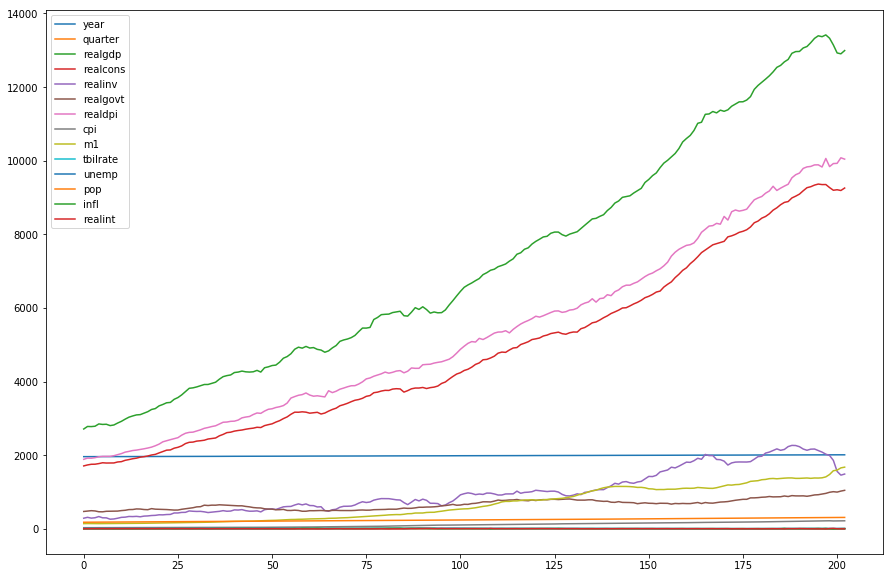

In [80]:
data.plot(figsize=(15,10))
print("quarterly macroeconomic indicators 1959-2009")

/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


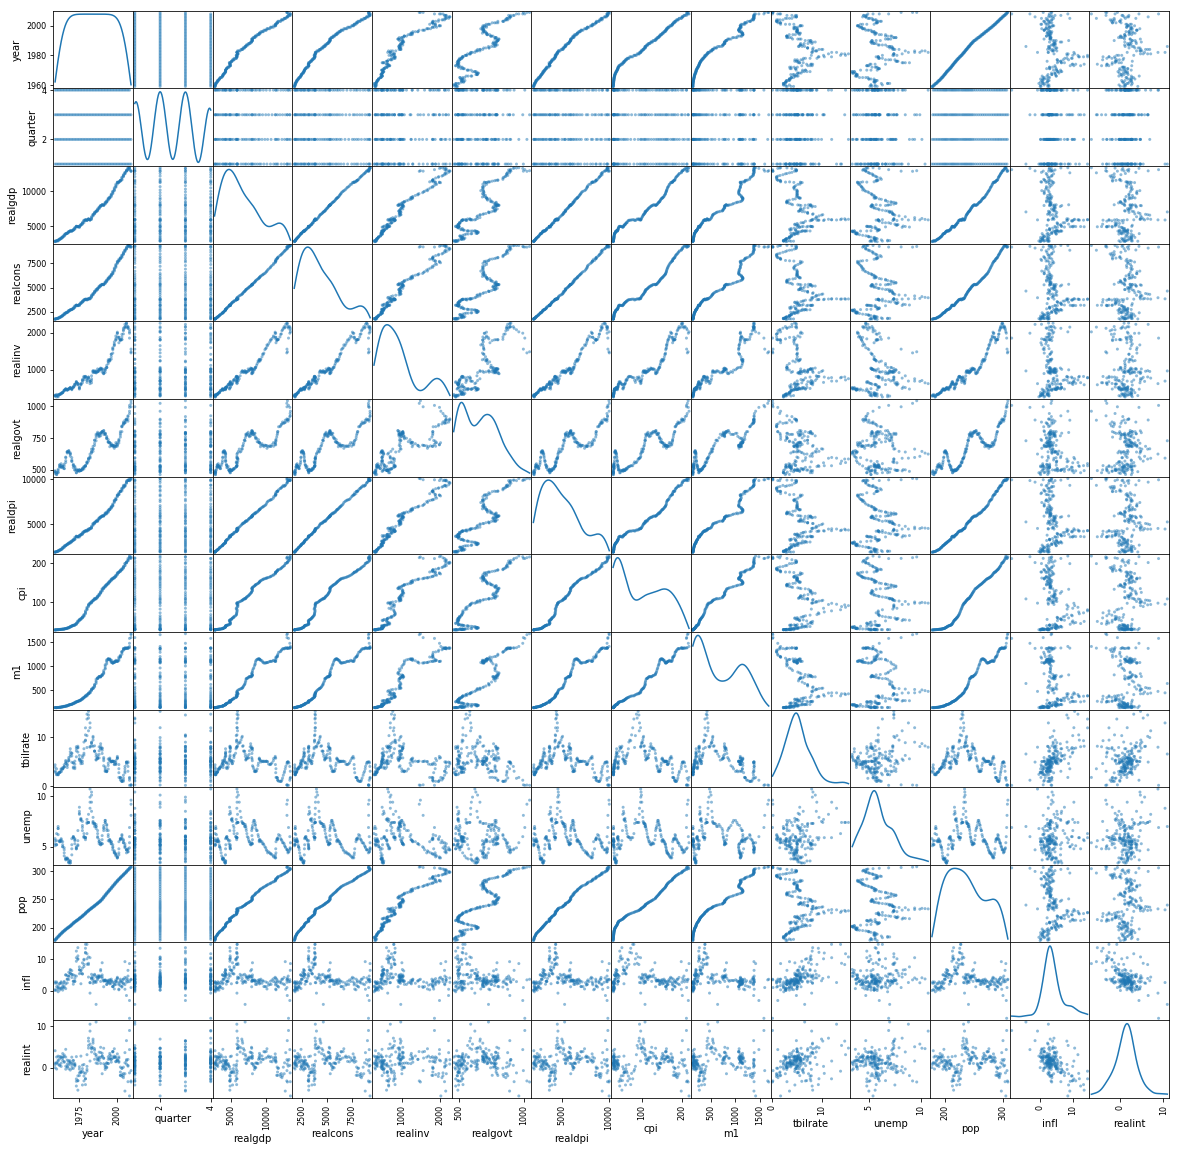

In [81]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,20), diagonal="density");

     year  unemp
0  1959.0    5.8
1  1959.0    5.1
2  1959.0    5.3
3  1959.0    5.6
4  1960.0    5.2


,year,unemp
count,203.000000,203.000000
mean,1983.876847,5.884729
std,14.686817,1.458574
min,1959.000000,3.400000
25%,1971.000000,4.900000
50%,1984.000000,5.700000
75%,1996.500000,6.800000
max,2009.000000,10.700000


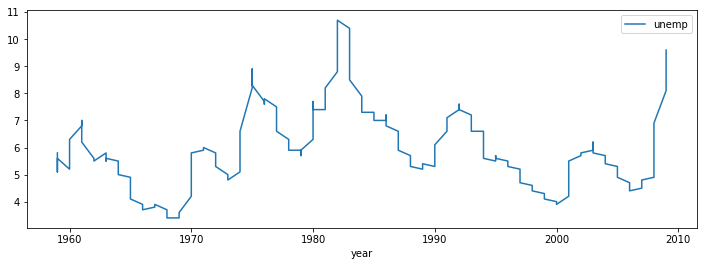

In [87]:
data = sm.datasets.macrodata.load_pandas().data
datadiff = data[['year', 'unemp']]
unemp = data.plot('year', 'unemp', figsize=(12,4));
print (datadiff.head())
datadiff.describe()

### fix time axis

In [88]:
# add quarters as fraction of years 
data['year'] = data.year + data.quarter * 0.25

      year  unemp
0  1959.25    5.8
1  1959.50    5.1
2  1959.75    5.3
3  1960.00    5.6
4  1960.25    5.2


,year,unemp
count,203.000000,203.000000
mean,1984.500000,5.884729
std,14.686303,1.458574
min,1959.250000,3.400000
25%,1971.875000,4.900000
50%,1984.500000,5.700000
75%,1997.125000,6.800000
max,2009.750000,10.700000


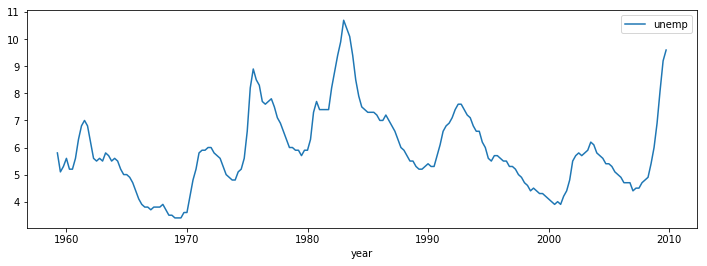

In [89]:
datadiff=data[['year', 'unemp']]
unemp = data.plot('year', 'unemp', figsize=(12,4));
print (datadiff.head())
datadiff.describe()

### alternative way, recreate time axis with date_from_range (this will be useful in the homework)

In [90]:
print (sm.tsa.datetools.dates_from_range('1959q1', '2009q4'))

[datetime.datetime(1959, 3, 31, 0, 0), datetime.datetime(1959, 6, 30, 0, 0), datetime.datetime(1959, 9, 30, 0, 0), datetime.datetime(1959, 12, 31, 0, 0), datetime.datetime(1960, 3, 31, 0, 0), datetime.datetime(1960, 6, 30, 0, 0), datetime.datetime(1960, 9, 30, 0, 0), datetime.datetime(1960, 12, 31, 0, 0), datetime.datetime(1961, 3, 31, 0, 0), datetime.datetime(1961, 6, 30, 0, 0), datetime.datetime(1961, 9, 30, 0, 0), datetime.datetime(1961, 12, 31, 0, 0), datetime.datetime(1962, 3, 31, 0, 0), datetime.datetime(1962, 6, 30, 0, 0), datetime.datetime(1962, 9, 30, 0, 0), datetime.datetime(1962, 12, 31, 0, 0), datetime.datetime(1963, 3, 31, 0, 0), datetime.datetime(1963, 6, 30, 0, 0), datetime.datetime(1963, 9, 30, 0, 0), datetime.datetime(1963, 12, 31, 0, 0), datetime.datetime(1964, 3, 31, 0, 0), datetime.datetime(1964, 6, 30, 0, 0), datetime.datetime(1964, 9, 30, 0, 0), datetime.datetime(1964, 12, 31, 0, 0), datetime.datetime(1965, 3, 31, 0, 0), datetime.datetime(1965, 6, 30, 0, 0), datet

In [91]:
datadiff.head()
datadiff.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))

del datadiff['year']

In [92]:
datadiff.head()

,unemp
1959-03-31,5.8
1959-06-30,5.1
1959-09-30,5.3
1959-12-31,5.6
1960-03-31,5.2


# explore autocorrelation

In [110]:
sm.graphics.tsa.plot_acf?

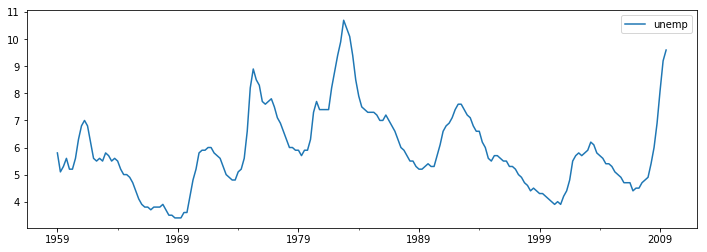

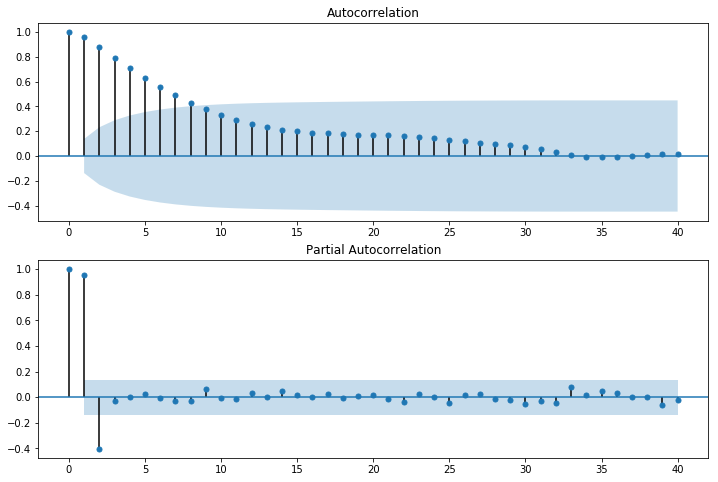

In [97]:
datadiff.plot(figsize=(12,4));
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

#plotting autocorrelation at 40 lags
fig = sm.graphics.tsa.plot_acf(datadiff, lags=40, ax=ax1,
                              alpha=0.05)
ax2 = fig.add_subplot(212)

#plotting partial autocorrelation at 40 lags
fig = sm.graphics.tsa.plot_pacf(datadiff, lags=40, ax=ax2)

# explore stationarity

In [102]:
print ("P-value for unit root (stationarity)")
print("%.2f"%sm.tsa.adfuller(datadiff.unemp)[1])


P-value for unit root (stationarity)
0.11


In [109]:
sm.tsa.ARMA?

order : iterable
    The (p,q) order of the model for the number of AR parameters,
    differences, and MA parameters to use.


# start with ARMA?

In [103]:
#creating a model with 
arma_mod20 = sm.tsa.ARMA(datadiff, (2,1)).fit()
print ("residuals : dubrin_watson test",
       sm.stats.durbin_watson(arma_mod20.resid.values))

arma_mod20.summary()

residuals : dubrin_watson test 2.01580967197


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(2, 1)   Log Likelihood                  -9.872
Method:                       css-mle   S.D. of innovations              0.251
Date:                Thu, 30 Nov 2017   AIC                             29.745
Time:                        09:27:04   BIC                             46.311
Sample:                    03-31-1959   HQIC                            36.447
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0872      0.435     13.990      0.000       5.234       6.940
ar.L1.unemp     1.5822      0.086     18.303      0.000       1.413       1.752
ar.L2.unemp    -0.6265      0.086     -7.295      0.000      -0.795      -0.458
ma.L1.unemp     0.1188      0.115      1.032      0.303      -0.107       0.344
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2627           -0.0412j            1.2634           -0.0052
AR.2            1.2627           +0.0412j            1.2634            0.0052
MA.1           -8.4166           +0.0000j            8.4166            0.5000
-----------------------------------------------------------------------------
"""

In [104]:
sm.stats.durbin_watson?


In [105]:
arma_mod50 = sm.tsa.ARMA(datadiff, (5,1)).fit()
print ("residuals : dubrin_watson test",
       sm.stats.durbin_watson(arma_mod50.resid.values))
arma_mod50.summary()


residuals : dubrin_watson test 1.9995872453


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(5, 1)   Log Likelihood                  -9.097
Method:                       css-mle   S.D. of innovations              0.250
Date:                Thu, 30 Nov 2017   AIC                             34.194
Time:                        09:27:13   BIC                             60.699
Sample:                    03-31-1959   HQIC                            44.917
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0858      0.446     13.631      0.000       5.211       6.961
ar.L1.unemp     1.4815      0.509      2.909      0.004       0.483       2.480
ar.L2.unemp    -0.4734      0.865     -0.547      0.585      -2.169       1.222
ar.L3.unemp     0.0192      0.447      0.043      0.966      -0.857       0.896
ar.L4.unemp    -0.1545      0.156     -0.993      0.322      -0.460       0.151
ar.L5.unemp     0.0805      0.080      1.000      0.318      -0.077       0.238
ma.L1.unemp     0.2157      0.508      0.425      0.671      -0.779       1.211
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1795           -1.6462j            2.0251           -0.3489
AR.2           -1.1795           +1.6462j            2.0251            0.3489
AR.3            1.1556           -0.0000j            1.1556           -0.0000
AR.4            1.5610           -0.4287j            1.6188           -0.0427
AR.5            1.5610           +0.4287j            1.6188            0.0427
MA.1           -4.6367           +0.0000j            4.6367            0.5000
-----------------------------------------------------------------------------
"""

In [42]:
arma_mod23 = sm.tsa.ARMA(datadiff, (2,3)).fit()
print ("residuals : dubrin_watson test",
       sm.stats.durbin_watson(arma_mod23.resid.values))
arma_mod23.summary()


residuals : dubrin_watson test 1.98488611611


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(2, 3)   Log Likelihood                  -8.251
Method:                       css-mle   S.D. of innovations              0.249
Date:                Thu, 30 Nov 2017   AIC                             30.502
Time:                        08:17:19   BIC                             53.695
Sample:                    03-31-1959   HQIC                            39.885
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.1022      0.477     12.795      0.000       5.167       7.037
ar.L1.unemp     1.1106      0.224      4.959      0.000       0.672       1.550
ar.L2.unemp    -0.1929      0.210     -0.919      0.359      -0.604       0.219
ma.L1.unemp     0.5805      0.209      2.776      0.006       0.171       0.990
ma.L2.unemp     0.3942      0.190      2.073      0.039       0.021       0.767
ma.L3.unemp     0.3507      0.157      2.235      0.027       0.043       0.658
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1173           +0.0000j            1.1173            0.0000
AR.2            4.6389           +0.0000j            4.6389            0.0000
MA.1           -1.3984           -0.0000j            1.3984           -0.5000
MA.2            0.1372           -1.4214j            1.4280           -0.2347
MA.3            0.1372           +1.4214j            1.4280            0.2347
-----------------------------------------------------------------------------
"""

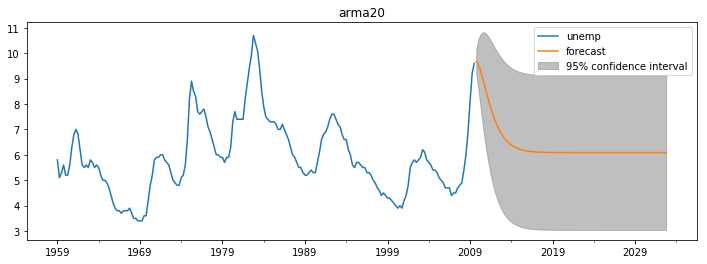

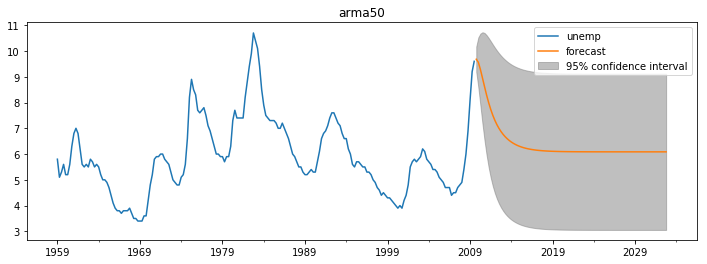

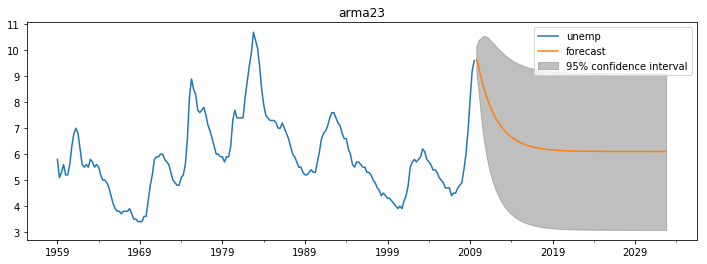

In [44]:
ax = datadiff.plot(figsize=(12,4));

arma_mod20.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("arma20");

ax = datadiff.plot(figsize=(12,4));
arma_mod50.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("arma50");

ax = datadiff.plot(figsize=(12,4));
arma_mod23.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("arma23");


# Removing trends by modelling them

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               realgovt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     579.7
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           3.88e-61
Time:                        08:17:39   Log-Likelihood:                -1154.2
No. Observations:                 203   AIC:                             2312.
Df Residuals:                     201   BIC:                             2319.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.574e+04    681.241    -23.103      0.000   -1.71e+04   -1.44e+04
year           8.2651      0.343     24.077      0.000       7.588       8.942
==============================================================================
Omnibus:                       68.963   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.094
Skew:                           0.043   Prob(JB):                      0.00390
Kurtosis:                       1.858   Cond. No.                     2.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

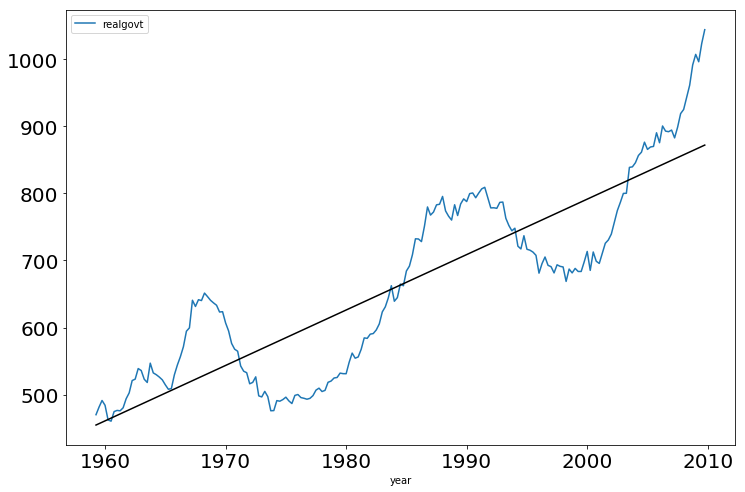

In [45]:
data = sm.datasets.macrodata.load_pandas().data


data['year'] = data.year + data.quarter * 0.25
datadiff2=data[['year', 'realgovt']]
ax = data.plot('year', 'realgovt', figsize=(12,8), fontsize=20);

#fit a line to the data
datadiff2.describe()
lf = sm.OLS(datadiff2['realgovt'], sm.add_constant(datadiff2['year'])).fit()
ax.plot(datadiff2['year'],lf.predict(), 'k-')
lf.summary()

/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,realgovt,realgovt_stat
count,203.000000,203.000000,2.030000e+02
mean,1984.500000,663.328640,6.641999e-13
std,14.686303,140.863655,7.147400e+01
min,1959.250000,460.400000,-1.082880e+02
25%,1971.875000,527.959500,-7.360733e+01
50%,1984.500000,662.412000,7.643611e+00
75%,1997.125000,773.049000,5.509427e+01
max,2009.750000,1044.088000,1.720654e+02


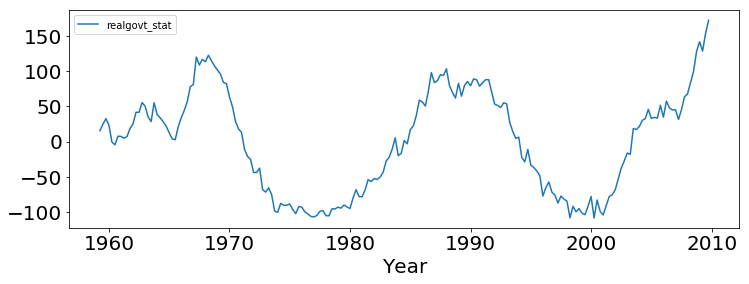

In [46]:
# remove the line fit model from the data: now it is stationary
datadiff2['realgovt_stat'] = (datadiff2.realgovt - lf.predict())
ax = datadiff2.plot('year', 'realgovt_stat', figsize=(12,4), fontsize=20)
ax.set_xlabel("Year", fontsize=20)
datadiff2.describe()

In [47]:
#print (sm.tsa.datetools.dates_from_range('1959q1', '2009q4'))
datadiff2.head()
datadiff2.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))

del datadiff2['year']
del datadiff2['realgovt']
datadiff2.head()


,realgovt_stat
1959-03-31,15.410269
1959-06-30,24.599993
1959-09-30,32.492717
1959-12-31,23.218440
1960-03-31,-0.700836


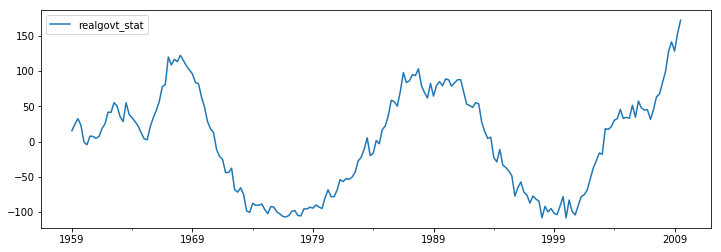

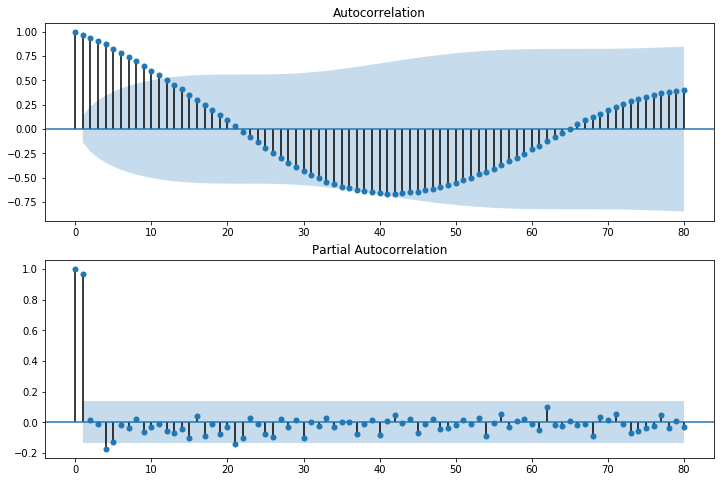

In [48]:
datadiff2.plot(figsize=(12,4));
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datadiff2.values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datadiff2, lags=80, ax=ax2)

In [50]:
arma_mod100 = sm.tsa.ARMA(datadiff2, (5,0)).fit()
print (sm.stats.durbin_watson(arma_mod100.resid.values))

arma_mod100.summary()

2.03916357339


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          realgovt_stat   No. Observations:                  203
Model:                     ARMA(5, 0)   Log Likelihood                -793.199
Method:                       css-mle   S.D. of innovations             11.913
Date:                Thu, 30 Nov 2017   AIC                           1600.398
Time:                        08:18:25   BIC                           1623.590
Sample:                    03-31-1959   HQIC                          1609.781
                         - 09-30-2009                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  17.5975     33.146      0.531      0.596     -47.367      82.562
ar.L1.realgovt_stat     0.9241      0.068     13.647      0.000       0.791       1.057
ar.L2.realgovt_stat     0.1413      0.094      1.504      0.134      -0.043       0.325
ar.L3.realgovt_stat     0.1599      0.095      1.684      0.094      -0.026       0.346
ar.L4.realgovt_stat     0.0329      0.095      0.345      0.731      -0.154       0.220
ar.L5.realgovt_stat    -0.2824      0.069     -4.068      0.000      -0.418      -0.146
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0874           -0.0461j            1.0884           -0.0067
AR.2            1.0874           +0.0461j            1.0884            0.0067
AR.3           -0.2562           -1.3667j            1.3905           -0.2795
AR.4           -0.2562           +1.3667j            1.3905            0.2795
AR.5           -1.5460           -0.0000j            1.5460           -0.5000
-----------------------------------------------------------------------------
"""

# ARIMA 

## PLAYING WITH PARAMETERS

In [51]:
data = sm.datasets.macrodata.load_pandas().data

datadiff3=data[['year', 'realgovt']]
datadiff3.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))

del datadiff3['year']

arima_mod110 = sm.tsa.ARIMA(datadiff3, (10,1,0)).fit()
print ("ARIMA 10,1,0", sm.stats.durbin_watson(arima_mod110.resid.values))

arima_mod110.summary()

arima_mod311 = sm.tsa.ARIMA(datadiff3, (3,1,1)).fit()
print ("ARIMA 3,1,0", sm.stats.durbin_watson(arima_mod311.resid.values))

arima_mod311.summary()

ARIMA 10,1,0 1.98720184023
ARIMA 3,1,0 2.0221639037


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.realgovt   No. Observations:                  202
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -790.142
Method:                       css-mle   S.D. of innovations             12.080
Date:                Thu, 30 Nov 2017   AIC                           1592.283
Time:                        08:18:44   BIC                           1612.133
Sample:                    06-30-1959   HQIC                          1600.314
                         - 09-30-2009                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.1549      2.020      1.562      0.120      -0.805       7.115
ar.L1.D.realgovt     0.5225      0.122      4.277      0.000       0.283       0.762
ar.L2.D.realgovt     0.0958      0.078      1.230      0.220      -0.057       0.248
ar.L3.D.realgovt     0.2144      0.078      2.754      0.006       0.062       0.367
ma.L1.D.realgovt    -0.5911      0.109     -5.406      0.000      -0.805      -0.377
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1157           -0.0000j            1.1157           -0.0000
AR.2           -0.7812           -1.8894j            2.0445           -0.3124
AR.3           -0.7812           +1.8894j            2.0445            0.3124
MA.1            1.6918           +0.0000j            1.6918            0.0000
-----------------------------------------------------------------------------
"""

# remove trend and use ARMA

In [52]:
datadiff2.head()

,realgovt_stat
1959-03-31,15.410269
1959-06-30,24.599993
1959-09-30,32.492717
1959-12-31,23.218440
1960-03-31,-0.700836


In [59]:
arma_mod51 = sm.tsa.ARMA(datadiff2, (5,1)).fit()
print (sm.stats.durbin_watson(arma_mod51.resid.values))
arma_mod51.summary()

1.97557345355


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          realgovt_stat   No. Observations:                  203
Model:                     ARMA(5, 1)   Log Likelihood                -791.329
Method:                       css-mle   S.D. of innovations             11.800
Date:                Thu, 30 Nov 2017   AIC                           1598.659
Time:                        08:20:08   BIC                           1625.164
Sample:                    03-31-1959   HQIC                          1609.382
                         - 09-30-2009                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.5318     27.234      0.534      0.594     -38.846      67.910
ar.L1.realgovt_stat     1.3135      0.183      7.191      0.000       0.955       1.671
ar.L2.realgovt_stat    -0.2441      0.200     -1.218      0.225      -0.637       0.149
ar.L3.realgovt_stat     0.1147      0.119      0.960      0.338      -0.119       0.349
ar.L4.realgovt_stat    -0.0102      0.125     -0.081      0.935      -0.255       0.235
ar.L5.realgovt_stat    -0.1910      0.095     -2.003      0.047      -0.378      -0.004
ma.L1.realgovt_stat    -0.4292      0.179     -2.393      0.018      -0.781      -0.078
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0464           -0.0790j            1.0494           -0.0120
AR.2            1.0464           +0.0790j            1.0494            0.0120
AR.3           -0.0931           -1.5545j            1.5573           -0.2595
AR.4           -0.0931           +1.5545j            1.5573            0.2595
AR.5           -1.9599           -0.0000j            1.9599           -0.5000
MA.1            2.3297           +0.0000j            2.3297            0.0000
-----------------------------------------------------------------------------
"""

In [60]:
## arma_mod20 = sm.tsa.ARMA(datadiff, (3,0)).fit()
print (sm.stats.durbin_watson(arma_mod20.resid.values))

arma_mod20.summary()

2.01580967197


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(2, 1)   Log Likelihood                  -9.872
Method:                       css-mle   S.D. of innovations              0.251
Date:                Thu, 30 Nov 2017   AIC                             29.745
Time:                        08:20:16   BIC                             46.311
Sample:                    03-31-1959   HQIC                            36.447
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0872      0.435     13.990      0.000       5.234       6.940
ar.L1.unemp     1.5822      0.086     18.303      0.000       1.413       1.752
ar.L2.unemp    -0.6265      0.086     -7.295      0.000      -0.795      -0.458
ma.L1.unemp     0.1188      0.115      1.032      0.303      -0.107       0.344
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2627           -0.0412j            1.2634           -0.0052
AR.2            1.2627           +0.0412j            1.2634            0.0052
MA.1           -8.4166           +0.0000j            8.4166            0.5000
-----------------------------------------------------------------------------
"""

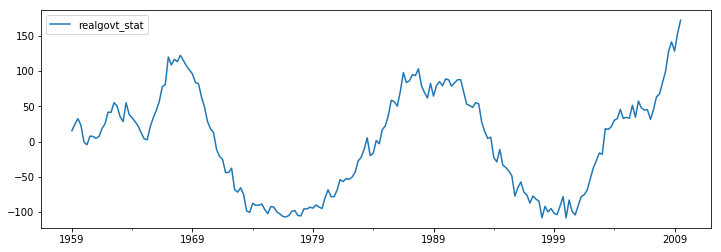

In [61]:
datadiff2.plot(figsize=(12,4));

Text(0.5,1,'ARMA (5,1)')

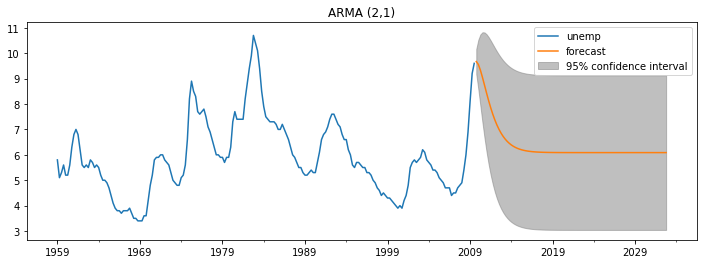

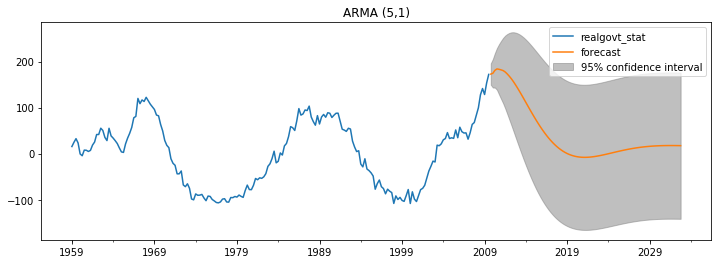

In [74]:
ax = datadiff.plot(figsize=(12,4));
arma_mod20.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("ARMA (2,1)")
ax = datadiff2.plot(figsize=(12,4));
arma_mod51.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("ARMA (5,1)")


# OR NOT REMOVING TRENDS AND USING ARIMA

Text(0.5,1,'ARIMA (3,1,1)')

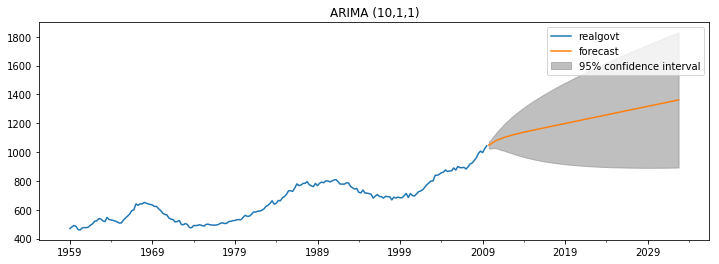

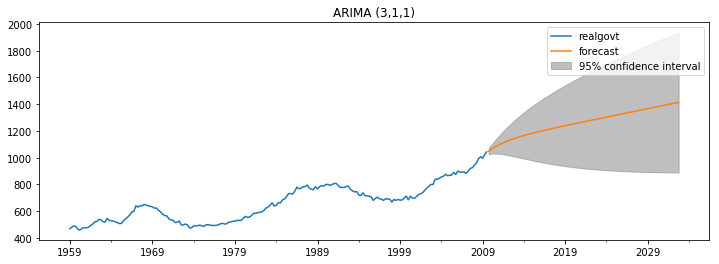

In [76]:
ax = datadiff3.plot(figsize=(12,4));
arima_mod110.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("ARIMA (10,1,1)")

ax = datadiff3.plot(figsize=(12,4));
arima_mod311.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("ARIMA (3,1,1)")
